In [133]:
import pandas as pd
import pyodbc
import numpy as np
import os



class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [134]:
import mysql.connector
#connecting to the mysql server 
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password=""
)

print(mydb)


In [135]:
mycursor = mydb.cursor(buffered=True)
mycursor.execute("USE bd_avplus")
#mycursor.execute("CREATE TABLE adherantchurn as SELECT id,statutsEnrolementCaAvp,suspensionImAvp,typePIDaAvp FROM adherentavpsfm ")  
sql_querry2 = 'SELECT * FROM adherantchurn'

adherantt= pd.read_sql(sql_querry2, con=mydb)
adherantt.head()

,id,statutsEnrolementCaAvp,suspensionImAvp,typePIDaAvp
0,1,AffiliÃ©,1.0,2
1,2,AffiliÃ©,1.0,2
2,3,AffiliÃ©,1.0,None
3,4,AffiliÃ©,1.0,1
4,5,AffiliÃ©,1.0,2


In [136]:
#mycursor.execute("CREATE TABLE classchurn as SELECT adherent_avp_id,sexeDaAvp,domaineActiviteDaAvp,dateNaissanceDaAvp FROM adherentcomplementavpsfm ")  
sql_queryyy = 'SELECT * FROM adherantcomplechurn'
dfff= pd.read_sql(sql_queryyy, con=mydb)
dfff.head()

,adherent_avp_id,sexeDaAvp,domaineActiviteDaAvp,dateNaissanceDaAvp
0,1,Masculin,ENSEIGNANT(E),1989-07-20
1,2,Masculin,CHAUFFEUR,1975-03-30
2,3,Masculin,ELECTRICIEN,None
3,4,Masculin,COMMERÃ‡ANT(E),1977-01-01
4,5,Masculin,MENUISIER,1974-05-07


In [137]:
#mycursor.execute("CREATE TABLE classchurn as SELECT montantCotisationCaAvp,adherent_avp_id,nomClasseAvp FROM classeavpsfm ")  

sql_query1 = ' SELECT * FROM classchurn'
classe= pd.read_sql(sql_query1, con=mydb)
classe.head()

,montantCotisationCaAvp,adherent_avp_id,nomClasseAvp
0,29450,1,Classe 1
1,29450,2,Classe 1
2,29450,3,Classe 1
3,29450,4,Classe 1
4,29450,5,Classe 1


In [138]:
#mycursor.execute("DROP TABLE paimentchurn")  
#mycursor.execute("CREATE TABLE paimentchurn as SELECT id, adherent_avp_id,montant_global,sourceImAvp FROM paiementavpsfm ")  
sql_query3 = ' SELECT * FROM paimentchurn'
paiment= pd.read_sql(sql_query3, con=mydb)
paiment.head()

,id,adherent_avp_id,montant_global,sourceImAvp
0,1,1142,60000.0,cash
1,2,1110,30000.0,cash
2,3,1191,29450.0,cash
3,4,1154,58900.0,cash
4,5,1175,94240.0,cash


In [139]:
#mycursor.execute("CREATE TABLE bureauchurn as SELECT adresse,label,id FROM bureauavpsfm ")  
ql_query = 'SELECT * FROM bureauchurn'
bureau= pd.read_sql(ql_query, con=mydb)
bureau.head()

,adresse,label,id
0,"81, Avenue HÃ©di chaker",Bureau 1,1
1,Rue LibertÃ©,Bureau 2,2
2,Ntomikorobougou,Ntomikorobougou,4
3,Hippodrome,Hippodrome,6
4,Sebenikoro,Sebenikoro,8


In [140]:
#mycursor.execute("CREATE TABLE adressechurn as SELECT adherent_avp_id,villeDaAvp,discritDaAvp,communeDaAvp FROM adresseavpsfm ")  
sql_query = 'SELECT * FROM adressechurn'
adresse= pd.read_sql(sql_query, con=mydb)
adresse.head()

,adherent_avp_id,villeDaAvp,discritDaAvp,communeDaAvp
0,1,None,7,2
1,2,None,7,1
2,3,None,None,None
3,4,None,7,1
4,5,None,,


In [141]:
#mycursor.execute("CREATE TABLE cotisationchurn as SELECT comptabilisation_avp_id,montantPayeImAvp,paiement_avp_id FROM cotisationavpsfm ")  
sql_query4 = ' SELECT * FROM cotisationchurn'
cotisation= pd.read_sql(sql_query4, con=mydb)
cotisation.head()

,comptabilisation_avp_id,montantPayeImAvp,paiement_avp_id
0,4791.0,29450.0,1.0
1,4792.0,29450.0,1.0
2,4793.0,1100.0,1.0
3,4624.0,29450.0,2.0
4,4625.0,550.0,2.0


In [142]:
#mycursor.execute("DROP TABLE comptabilischurn ")
#mycursor.execute("CREATE TABLE comptabilischurn as SELECT classe_comptabilite_avp_id,adherent_avp_id,montant_cotisation, trimestre, solde, compteDebit, compteCredit FROM comptabilisationavpsfm ")  
sql_query5 = ' SELECT * FROM comptabilischurn'
comptabilis= pd.read_sql(sql_query5, con=mydb)
comptabilis.head()

,classe_comptabilite_avp_id,adherent_avp_id,montant_cotisation,trimestre,solde,compteDebit,compteCredit
0,1,1,29450.0,Trimestre 4,0.0,29450.0,0.0
1,1,1,29450.0,Trimestre 1,0.0,29450.0,0.0
2,1,1,29450.0,Trimestre 2,0.0,29450.0,0.0
3,1,1,29450.0,Trimestre 3,0.0,6650.0,22800.0
4,1,1,29450.0,Trimestre 4,0.0,0.0,29450.0


In [143]:
df=display('dfff', 'adherantt', 'pd.merge(dfff, adherantt, left_on="adherent_avp_id", right_on="id")')
df

,adherent_avp_id,sexeDaAvp,domaineActiviteDaAvp,dateNaissanceDaAvp
0,1,Masculin,ENSEIGNANT(E),1989-07-20
1,2,Masculin,CHAUFFEUR,1975-03-30
2,3,Masculin,ELECTRICIEN,None
3,4,Masculin,COMMERÃ‡ANT(E),1977-01-01
4,5,Masculin,MENUISIER,1974-05-07
...,...,...,...,...
15873,54351,None,None,None
15874,54353,None,None,None
15875,54355,None,None,None
15876,54357,None,None,None


In [144]:
data=pd.merge(dfff, adherantt, left_on="adherent_avp_id", right_on="id").drop('id', axis=1)
data.head()

,adherent_avp_id,sexeDaAvp,domaineActiviteDaAvp,dateNaissanceDaAvp,statutsEnrolementCaAvp,suspensionImAvp,typePIDaAvp
0,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2
1,2,Masculin,CHAUFFEUR,1975-03-30,AffiliÃ©,1.0,2
2,3,Masculin,ELECTRICIEN,None,AffiliÃ©,1.0,None
3,4,Masculin,COMMERÃ‡ANT(E),1977-01-01,AffiliÃ©,1.0,1
4,5,Masculin,MENUISIER,1974-05-07,AffiliÃ©,1.0,2


In [145]:
df=display('data', 'bureau', 'pd.merge(data, bureau, left_on="adherent_avp_id", right_on="id")')
df

,adherent_avp_id,sexeDaAvp,domaineActiviteDaAvp,dateNaissanceDaAvp,statutsEnrolementCaAvp,suspensionImAvp,typePIDaAvp
0,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2
1,2,Masculin,CHAUFFEUR,1975-03-30,AffiliÃ©,1.0,2
2,3,Masculin,ELECTRICIEN,None,AffiliÃ©,1.0,None
3,4,Masculin,COMMERÃ‡ANT(E),1977-01-01,AffiliÃ©,1.0,1
4,5,Masculin,MENUISIER,1974-05-07,AffiliÃ©,1.0,2
...,...,...,...,...,...,...,...
15873,54351,None,None,None,En instance,0.0,None
15874,54353,None,None,None,En instance,0.0,None
15875,54355,None,None,None,En instance,0.0,None
15876,54357,None,None,None,En instance,0.0,None


In [146]:
data1=pd.merge(data, bureau, left_on="adherent_avp_id", right_on="id").drop('id', axis=1)
data1.head()


,adherent_avp_id,sexeDaAvp,domaineActiviteDaAvp,dateNaissanceDaAvp,statutsEnrolementCaAvp,suspensionImAvp,typePIDaAvp,adresse,label
0,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1
1,2,Masculin,CHAUFFEUR,1975-03-30,AffiliÃ©,1.0,2,Rue LibertÃ©,Bureau 2
2,4,Masculin,COMMERÃ‡ANT(E),1977-01-01,AffiliÃ©,1.0,1,Ntomikorobougou,Ntomikorobougou
3,6,Masculin,TECHNICIEN LABORATOIRE,None,AffiliÃ©,1.0,None,Hippodrome,Hippodrome
4,8,Masculin,COMPTABLE,1992-12-31,AffiliÃ©,1.0,1,Sebenikoro,Sebenikoro


In [147]:
dfm=display('data1', 'classe', 'pd.merge(data1, classe, left_on="adherent_avp_id", right_on="adherent_avp_id")')
dfm


,adherent_avp_id,sexeDaAvp,domaineActiviteDaAvp,dateNaissanceDaAvp,statutsEnrolementCaAvp,suspensionImAvp,typePIDaAvp,adresse,label
0,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1
1,2,Masculin,CHAUFFEUR,1975-03-30,AffiliÃ©,1.0,2,Rue LibertÃ©,Bureau 2
2,4,Masculin,COMMERÃ‡ANT(E),1977-01-01,AffiliÃ©,1.0,1,Ntomikorobougou,Ntomikorobougou
3,6,Masculin,TECHNICIEN LABORATOIRE,None,AffiliÃ©,1.0,None,Hippodrome,Hippodrome
4,8,Masculin,COMPTABLE,1992-12-31,AffiliÃ©,1.0,1,Sebenikoro,Sebenikoro
5,10,Masculin,TAILLEUR,None,AffiliÃ©,1.0,None,Korofina,Korofina
6,12,Masculin,OUVRIER,1984-03-31,AffiliÃ©,1.0,1,Djelibougou,Djelibougou
7,14,Masculin,EMPLOYE DE COMMERCE,1999-11-29,AffiliÃ©,1.0,2,FaladjÃ¨,FaladjÃ¨
8,16,Masculin,CHAUFFEUR,1982-02-24,AffiliÃ©,1.0,1,Les Halles de Bamako,Les Halles de Bamako
9,18,Masculin,JOURNALISTE,None,AffiliÃ©,1.0,None,Baco-djicoroni,Baco-djicoroni


In [148]:
data2=pd.merge(data1, classe, left_on="adherent_avp_id", right_on="adherent_avp_id")
data2.head()

,adherent_avp_id,sexeDaAvp,domaineActiviteDaAvp,dateNaissanceDaAvp,statutsEnrolementCaAvp,suspensionImAvp,typePIDaAvp,adresse,label,montantCotisationCaAvp,nomClasseAvp
0,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,Classe 1
1,2,Masculin,CHAUFFEUR,1975-03-30,AffiliÃ©,1.0,2,Rue LibertÃ©,Bureau 2,29450,Classe 1
2,4,Masculin,COMMERÃ‡ANT(E),1977-01-01,AffiliÃ©,1.0,1,Ntomikorobougou,Ntomikorobougou,29450,Classe 1
3,6,Masculin,TECHNICIEN LABORATOIRE,None,AffiliÃ©,1.0,None,Hippodrome,Hippodrome,29450,Classe 1
4,8,Masculin,COMPTABLE,1992-12-31,AffiliÃ©,1.0,1,Sebenikoro,Sebenikoro,29450,Classe 1


In [149]:
dfm=display('cotisation', 'paiment', 'pd.merge(cotisation, paiment, left_on="paiement_avp_id", right_on="id")')
dfm

,comptabilisation_avp_id,montantPayeImAvp,paiement_avp_id
0,4791.0,29450.0,1.0
1,4792.0,29450.0,1.0
2,4793.0,1100.0,1.0
3,4624.0,29450.0,2.0
4,4625.0,550.0,2.0
...,...,...,...
35384,125384.0,10000.0,31384.0
35385,124055.0,20000.0,31386.0
35386,69278.0,29450.0,31388.0
35387,87615.0,29450.0,31388.0


In [150]:
data3=pd.merge(cotisation, paiment, left_on="paiement_avp_id", right_on="id").drop('paiement_avp_id', axis=1)
data3.head()

,comptabilisation_avp_id,montantPayeImAvp,id,adherent_avp_id,montant_global,sourceImAvp
0,4791.0,29450.0,1,1142,60000.0,cash
1,4792.0,29450.0,1,1142,60000.0,cash
2,4793.0,1100.0,1,1142,60000.0,cash
3,4624.0,29450.0,2,1110,30000.0,cash
4,4625.0,550.0,2,1110,30000.0,cash


In [151]:
daa4=display('data2', 'data3', 'pd.merge(data2, data3, left_on="adherent_avp_id", right_on="adherent_avp_id")')
daa4

,adherent_avp_id,sexeDaAvp,domaineActiviteDaAvp,dateNaissanceDaAvp,statutsEnrolementCaAvp,suspensionImAvp,typePIDaAvp,adresse,label,montantCotisationCaAvp,nomClasseAvp
0,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,Classe 1
1,2,Masculin,CHAUFFEUR,1975-03-30,AffiliÃ©,1.0,2,Rue LibertÃ©,Bureau 2,29450,Classe 1
2,4,Masculin,COMMERÃ‡ANT(E),1977-01-01,AffiliÃ©,1.0,1,Ntomikorobougou,Ntomikorobougou,29450,Classe 1
3,6,Masculin,TECHNICIEN LABORATOIRE,None,AffiliÃ©,1.0,None,Hippodrome,Hippodrome,29450,Classe 1
4,8,Masculin,COMPTABLE,1992-12-31,AffiliÃ©,1.0,1,Sebenikoro,Sebenikoro,29450,Classe 1
5,10,Masculin,TAILLEUR,None,AffiliÃ©,1.0,None,Korofina,Korofina,29450,Classe 1
6,12,Masculin,OUVRIER,1984-03-31,AffiliÃ©,1.0,1,Djelibougou,Djelibougou,29450,Classe 1
7,14,Masculin,EMPLOYE DE COMMERCE,1999-11-29,AffiliÃ©,1.0,2,FaladjÃ¨,FaladjÃ¨,29450,Classe 1
8,16,Masculin,CHAUFFEUR,1982-02-24,AffiliÃ©,1.0,1,Les Halles de Bamako,Les Halles de Bamako,29450,Classe 1
9,18,Masculin,JOURNALISTE,None,AffiliÃ©,1.0,None,Baco-djicoroni,Baco-djicoroni,29450,Classe 1


In [152]:
data4=pd.merge(data2, data3, left_on="adherent_avp_id", right_on="adherent_avp_id")
data4.head()

,adherent_avp_id,sexeDaAvp,domaineActiviteDaAvp,dateNaissanceDaAvp,statutsEnrolementCaAvp,suspensionImAvp,typePIDaAvp,adresse,label,montantCotisationCaAvp,nomClasseAvp,comptabilisation_avp_id,montantPayeImAvp,id,montant_global,sourceImAvp
0,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,Classe 1,1.0,10000.0,38,10000.0,cash
1,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,Classe 1,1.0,10000.0,295,10000.0,cash
2,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,Classe 1,1.0,9450.0,505,10000.0,cash
3,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,Classe 1,2.0,550.0,505,10000.0,cash
4,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,Classe 1,2.0,10000.0,736,10000.0,cash


In [153]:
ddfm=display('data4', 'comptabilis', 'pd.merge(data3, comptabilis, left_on="adherent_avp_id", right_on="adherent_avp_id")')
ddfm

,adherent_avp_id,sexeDaAvp,domaineActiviteDaAvp,dateNaissanceDaAvp,statutsEnrolementCaAvp,suspensionImAvp,typePIDaAvp,adresse,label,montantCotisationCaAvp,nomClasseAvp,comptabilisation_avp_id,montantPayeImAvp,id,montant_global,sourceImAvp
0,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,Classe 1,1.0,10000.0,38,10000.0,cash
1,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,Classe 1,1.0,10000.0,295,10000.0,cash
2,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,Classe 1,1.0,9450.0,505,10000.0,cash
3,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,Classe 1,2.0,550.0,505,10000.0,cash
4,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,Classe 1,2.0,10000.0,736,10000.0,cash
5,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,Classe 1,2.0,10000.0,754,10000.0,cash
6,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,Classe 1,2.0,8900.0,903,10000.0,cash
7,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,Classe 1,3.0,1100.0,903,10000.0,cash
8,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,Classe 1,3.0,10000.0,1225,10000.0,cash
9,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,Classe 1,3.0,10000.0,1679,10000.0,cash


In [154]:
data5=pd.merge(data4, comptabilis, left_on="adherent_avp_id", right_on="adherent_avp_id")
data5.head()

,adherent_avp_id,sexeDaAvp,domaineActiviteDaAvp,dateNaissanceDaAvp,statutsEnrolementCaAvp,suspensionImAvp,typePIDaAvp,adresse,label,montantCotisationCaAvp,...,montantPayeImAvp,id,montant_global,sourceImAvp,classe_comptabilite_avp_id,montant_cotisation,trimestre,solde,compteDebit,compteCredit
0,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,...,10000.0,38,10000.0,cash,1,29450.0,Trimestre 4,0.0,29450.0,0.0
1,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,...,10000.0,38,10000.0,cash,1,29450.0,Trimestre 1,0.0,29450.0,0.0
2,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,...,10000.0,38,10000.0,cash,1,29450.0,Trimestre 2,0.0,29450.0,0.0
3,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,...,10000.0,38,10000.0,cash,1,29450.0,Trimestre 3,0.0,6650.0,22800.0
4,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,"81, Avenue HÃ©di chaker",Bureau 1,29450,...,10000.0,38,10000.0,cash,1,29450.0,Trimestre 4,0.0,0.0,29450.0


In [155]:
data5['Age'] = data5['dateNaissanceDaAvp']

In [156]:
#churn_df_final = data5[['montantPayeImAvp','domaineActiviteDaAvp','suspensionImAvp','typePIDaAvp','adresse','label','montant_global','montantCotisationCaAvp','sourceImAvp','trimestre','compteDebit','compteCredit','Age']]
#churn_df_final= churn_df_final.reset_index(drop=True)

In [157]:
churn_df_final = data5[['montantPayeImAvp','suspensionImAvp','montant_global','montantCotisationCaAvp','trimestre']]
churn_df_final= churn_df_final.reset_index(drop=True)

In [158]:
churn_df_final

,montantPayeImAvp,suspensionImAvp,montant_global,montantCotisationCaAvp,trimestre
0,10000.0,1.0,10000.0,29450,Trimestre 4
1,10000.0,1.0,10000.0,29450,Trimestre 1
2,10000.0,1.0,10000.0,29450,Trimestre 2
3,10000.0,1.0,10000.0,29450,Trimestre 3
4,10000.0,1.0,10000.0,29450,Trimestre 4
...,...,...,...,...,...
447,15650.0,0.0,30000.0,29450,Trimestre 3
448,15650.0,0.0,30000.0,29450,Trimestre 4
449,15650.0,0.0,30000.0,29450,Trimestre 1
450,15650.0,0.0,30000.0,29450,Trimestre 2


In [159]:
churn_df_final['trimestre']=pd.factorize(churn_df_final['trimestre'])[0]


In [160]:
#churn_df_final['trimestre']=pd.factorize(churn_df_final['trimestre'])[0]
#churn_df_final['sourceImAvp']=pd.factorize(churn_df_final['sourceImAvp'])[0]
#churn_df_final['label']=pd.factorize(churn_df_final['label'])[0]
#churn_df_final['adresse']=pd.factorize(churn_df_final['adresse'])[0]
#churn_df_final['domaineActiviteDaAvp']=pd.factorize(churn_df_final['domaineActiviteDaAvp'])[0]
#churn_df_final['typePIDaAvp']=pd.factorize(churn_df_final['typePIDaAvp'])[0]

#churn_df_final

In [161]:
churn_df_final['trimestre'] = churn_df_final['trimestre'].astype('int')


In [162]:
#churn_df_final['trimestre'] = churn_df_final['trimestre'].astype('int')
#churn_df_final['domaineActiviteDaAvp'] = churn_df_final['domaineActiviteDaAvp'].astype('int')
#churn_df_final['adresse'] = churn_df_final['adresse'].astype('int')
#churn_df_final['label'] = churn_df_final['label'].astype('int')
#churn_df_final['sourceImAvp'] = churn_df_final['sourceImAvp'].astype('int')
#churn_df_final['typePIDaAvp'] = churn_df_final['typePIDaAvp'].astype('int')


In [163]:
X = np.asarray(churn_df_final[['montantPayeImAvp','montantCotisationCaAvp','montant_global','trimestre']])
X[0:5]

array([[10000.0, '29450', 10000.0, 0],
       [10000.0, '29450', 10000.0, 1],
       [10000.0, '29450', 10000.0, 2],
       [10000.0, '29450', 10000.0, 3],
       [10000.0, '29450', 10000.0, 0]], dtype=object)

In [164]:
#X = np.asarray(churn_df_final[['montantPayeImAvp','domaineActiviteDaAvp','montantCotisationCaAvp','typePIDaAvp','adresse','label','montant_global','sourceImAvp','trimestre','compteDebit','compteCredit','Age']])
#X[0:5]

In [165]:
y = np.asarray(churn_df_final['suspensionImAvp'])
y [0:5]

array([1., 1., 1., 1., 1.])

In [166]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-0.5 ,  0.  , -0.79, -1.47],
       [-0.5 ,  0.  , -0.79, -0.55],
       [-0.5 ,  0.  , -0.79,  0.37],
       ...,
       [ 0.  ,  0.  , -0.2 , -0.55],
       [ 0.  ,  0.  , -0.2 ,  0.37],
       [ 0.  ,  0.  , -0.2 ,  1.3 ]])

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (361, 4) (361,)
Test set: (91, 4) (91,)


In [168]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=150,n_jobs=2)

In [169]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [170]:
yhat=y_pred

In [171]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",(metrics.accuracy_score(y_test, yhat))*100,'%')

Accuracy: 90.10989010989012 %


[[54  4]
 [ 5 28]]
Confusion matrix, without normalization
[[54  4]
 [ 5 28]]


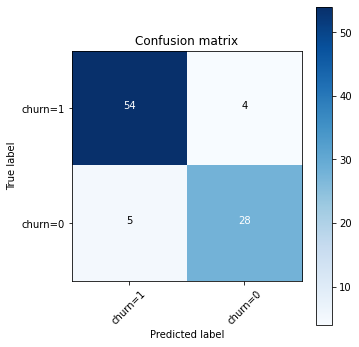

In [183]:
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #fig3.figure.savefig("aaa.png")
    
print(confusion_matrix(y_test, yhat, labels=[1,0]))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
fig = plt.figure(figsize=(5,5))

plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [173]:
a

In [174]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

Confusion matrix, without normalization
[[54  4]
 [ 5 28]]


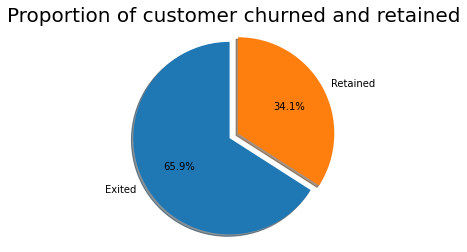

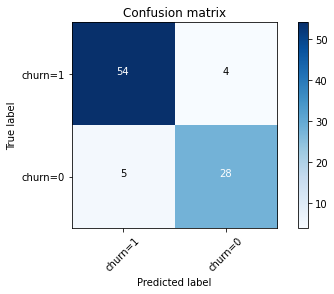

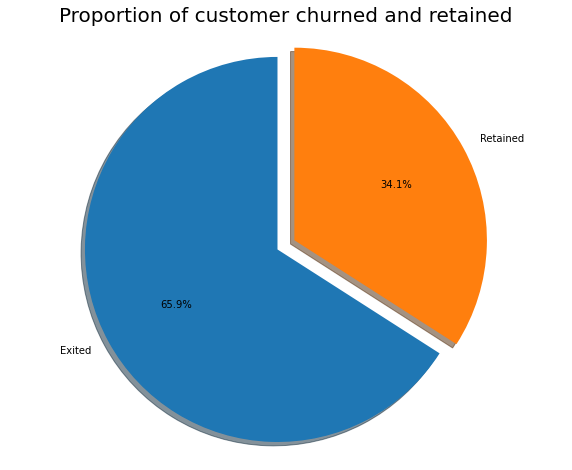

In [175]:
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
labels = 'Exited', 'Retained'
sizes = [data5.suspensionImAvp[data5['suspensionImAvp']==1].count(), data5.suspensionImAvp[data5['suspensionImAvp']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

TypeError: float() argument must be a string or a number, not 'datetime.date'

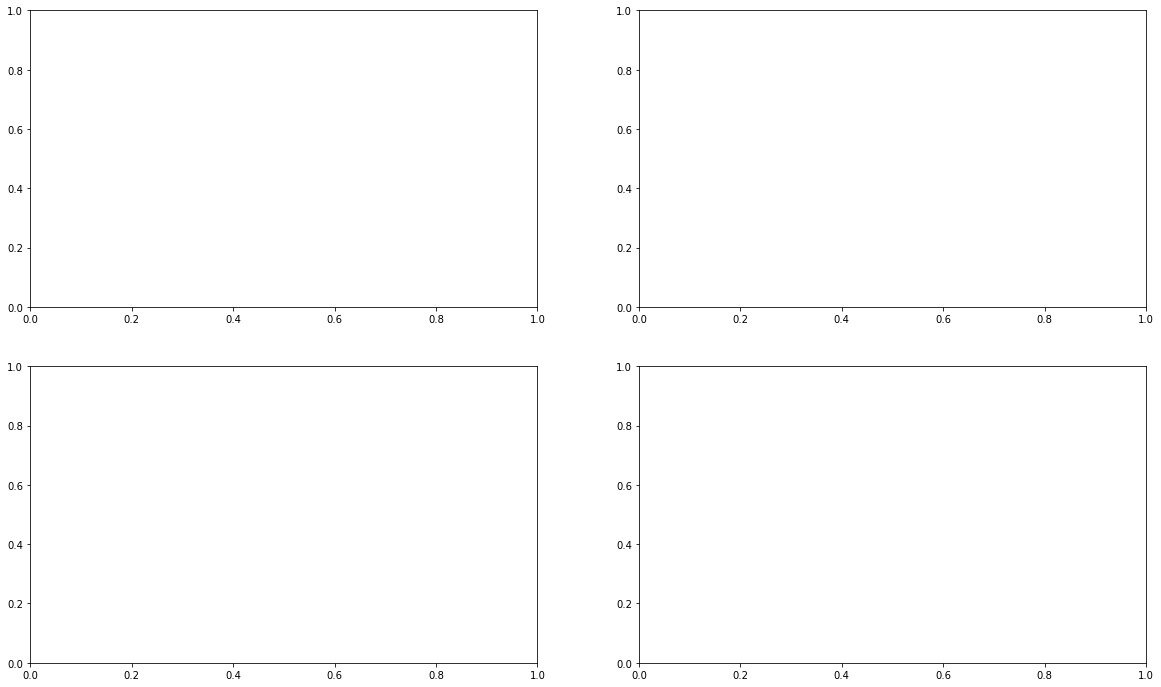

In [180]:
import seaborn as sns 
data['Age'] = data['dateNaissanceDaAvp']
#Relations based on the continuous data attributes
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.boxplot(y='Age',x = 'suspensionImAvp', hue = 'suspensionImAvp',data = data , ax=axarr[0][0])
sns.boxplot(y='compteCredit',x = 'suspensionImAvp', hue = 'suspensionImAvp',data = data, ax=axarr[0][1])
sns.boxplot(y='compteDebit',x = 'suspensionImAvp', hue = 'suspensionImAvp',data = data, ax=axarr[1][0])
sns.boxplot(y='montant_global',x = 'suspensionImAvp', hue = 'suspensionImAvp',data = data, ax=axarr[1][1])
plt.show()

In [177]:
data.head()


,adherent_avp_id,sexeDaAvp,domaineActiviteDaAvp,dateNaissanceDaAvp,statutsEnrolementCaAvp,suspensionImAvp,typePIDaAvp,Age
0,1,Masculin,ENSEIGNANT(E),1989-07-20,AffiliÃ©,1.0,2,1989-07-20
1,2,Masculin,CHAUFFEUR,1975-03-30,AffiliÃ©,1.0,2,1975-03-30
2,3,Masculin,ELECTRICIEN,None,AffiliÃ©,1.0,None,None
3,4,Masculin,COMMERÃ‡ANT(E),1977-01-01,AffiliÃ©,1.0,1,1977-01-01
4,5,Masculin,MENUISIER,1974-05-07,AffiliÃ©,1.0,2,1974-05-07


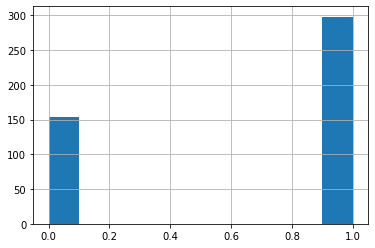

In [178]:
churn_df_final['suspensionImAvp'].hist()

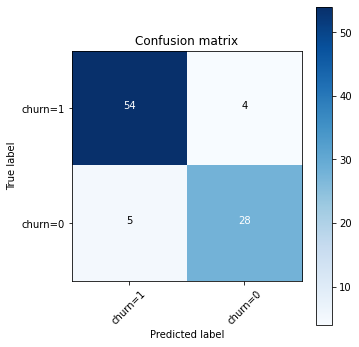

In [184]:
fig